# Palmer Penguins Introduction
***
This notebook contains my analysis of the famous palmer penguins dataset.

![Palmer](https://upload.wikimedia.org/wikipedia/commons/thumb/2/24/Antarctica_relief_location_map.jpg/240px-Antarctica_relief_location_map.jpg)

The data set is available [on Github](https://allisonhorst.github.io/palmerpenguins/).

The Palmer Penguin data set was collected by Dr. Kristen Gorman at Palmer Station in Antarctica.
The data set was originally created with the intention of studying penguin foraging behavior and environmental variability relationships.
This data set is now commonly used to study data analytics and machine learning.
The data set looks at the following variables:
|Variable      |Type/Unit                 |
|--------------|:------------------------ |
|Species       |Adelie/ Chinstrap/ Gentoo |
|Island        |Torgersen/ Biscoe/ Dream  |
|Bill length   | mm                       |
|Bill depth    | mm                       |   
|Flipper length| mm                       |
|Body mass     | g                        |
|Sex           | male/female/NaN          |

The three species of penguins are pictured below:
<div style="display: flex; justify-content: space-between;">
    <div style="text-align: center;">
        <strong>Adelie</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/8/82/Manchot_Ad%C3%A9lie_-_Adelie_Penguin.jpg" style="max-width: 100%; height: 200px;">
    </div>
    <div style="text-align: center;">
        <strong>Chinstrap</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cd/Chinstrap_Penguin.jpg/160px-Chinstrap_Penguin.jpg" style="max-width: 100%; height: 200px;">
    </div>
    <div style="text-align: center;">
        <strong>Gentoo</strong>
        <br>
        <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/00/Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg/800px-Brown_Bluff-2016-Tabarin_Peninsula%E2%80%93Gentoo_penguin_%28Pygoscelis_papua%29_03.jpg"style="max-width: 100%; height: 200px;">
    </div>
</div>

The penguins had their species identified, were sexed, measured and the island on which they were found was recorded.
The entire data set is comprised of 344 penguins:
|Species | Amount|
|--------|:------:|
|Adelie  |152|
|Chinstrap|124|
|Gentoo  |68|

This notebook will give an overview of the data set, suggest variables for modelling and create appropriate bar and histogram charts. It will then provide further analysis of 2 appropriate variables to draw correlations and reasonable conclusions.

Note: Sources are provided accordingly in some instances these were used in conjunction with AI to gain a simpler understanding of how to implement.

<small>Sources:

* Introduction to the data set [here](https://cran.r-project.org/web/packages/palmerpenguins/readme/README.html)
* HTML Image formatting and insertion [Here](https://www.w3schools.com/html/html_images.asp)

</small>

## Imports
***
We use pandas for the dataframe data structure

It allows us to investigate CSV files amongst other features more information on Pandas can be found [here](https://pandas.pydata.org/docs/)

In [18]:
# Data frames.
import pandas as pd

We use matplotlib for creating bar charts and histograms more information on matplotlib can be found [here](https://matplotlib.org/stable/index.html)

In [19]:
# Import Matplotlib
import matplotlib.pyplot as plt

We will use Seaborn for other types of data visualizations more information on seaborn can be found [here](https://seaborn.pydata.org/)


In [20]:
import seaborn as sns

## Load Data
Load the palmer penguins data set from a URL.

In [21]:
# Load the penguins data set.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

The data is now loaded and we can inspect it.

In [22]:
# Lets have a look.
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Inspect Data
***

In [23]:
#Look at the first row.
df.iloc[0]

species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [24]:
# Let's understand the types of data we have in this data set.
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

We can see above that the data is either in the format of floating point numbers or objects. Objects are non-heterogenous data and are common for strings. Floating point numbers should be treated with caution especially if further calculations or manipulations of the data are performed. This is because binary systems are commonly not accurate due to the 64 bit limits and therefore can lead to rounding.

Interestingly one of the variables that we do not always have a clear value for is sex. This is most likely due to the surveyor not being able to sex the penguin at the time. We will therefore exclude non-sexed penguins in some of our analysis. 

The variables that have the most value in my opinion are the float64 variables. That is because they are quantifiable allowing for a more clearer analysis and comparison. The island, species and sex values whilst interesting are quite limited in that they can only be one of a number of predetermined results whereas bill length, bill depth flipper length and body mass can offer us a more data rich picture and allow us to make inferences more readily. 


This analysis would like to take the penguin measurements to:
1. Determine trends of penguin measurements between species.
2. Determine differences of penguin measurement between sexes where possible.
3. Use these findings see if we can make a reasonable correlation analysis and the value of this.


<small>Sources:

[Floating point errors in python](https://www.geeksforgeeks.org/floating-point-error-in-python/) 

Information on Palmer Penguin study gaps in data: Gorman, Kristen B. & Williams, Tony & Fraser, William. (2014). Ecological Sexual Dimorphism and Environmental Variability within a Community of Antarctic Penguins (Genus Pygoscelis). PloS one. 9. e90081. 10.1371/journal.pone.0090081. 
<\small>

In [25]:
# Sex of penguins 
df['sex']

0        MALE
1      FEMALE
2      FEMALE
3         NaN
4      FEMALE
        ...  
339       NaN
340    FEMALE
341      MALE
342    FEMALE
343      MALE
Name: sex, Length: 344, dtype: object

In [26]:
# Count the number of penguins of each sex  
Value_counts = df['sex'].value_counts()
# How many of these sexes are there in total?
Total_Identifiable_Penguins = Value_counts.sum()

print(Value_counts)

print(Total_Identifiable_Penguins)

sex
MALE      168
FEMALE    165
Name: count, dtype: int64
333


As one can see above there are 333 penguins that have been sexed and using the data it might be possible to estimate the unknown sexes of the penguins based on the analysis.

In [27]:
# Descibe the data set.
df.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Bar Chart
***
In This bar chart we will look at the bill length of each species and sex of penguin.


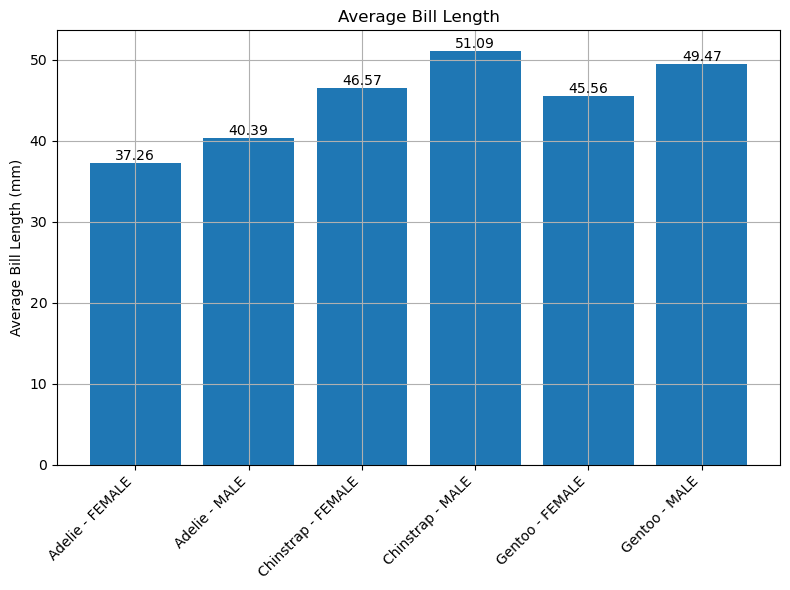

In [28]:
# We want to first get rid of any of the unidentified sexed penguins
defineddf = df.dropna(subset=['sex'])

# Average bill length per sex needs to be calculated
# Using groupby we group species and sex with lengths in mm average
defineddf_billlengthaverage = defineddf.groupby(['species', 'sex'])['bill_length_mm'].mean().reset_index()

# Plotting average bill length
plt.figure(figsize=(8, 6))

# Creating the bar chart looking at the species and sex separating them into male and female and the different species and prints their average lengths
plt.bar([f'{species} - {sex}' for species, sex in zip(defineddf_billlengthaverage['species'], defineddf_billlengthaverage['sex'])], 
        defineddf_billlengthaverage['bill_length_mm'])
plt.xticks(rotation=45, ha='right')
plt.title('Average Bill Length')
plt.ylabel('Average Bill Length (mm)')
plt.grid(True)

# Adding text labels for each bar
for x, y in enumerate(defineddf_billlengthaverage['bill_length_mm']):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [29]:

# Calculate differences and percentage differences for bill length between sexes within each species
# Create a differences list
differences_list = []

# Iterate over each species
for species in defineddf['species'].unique():
    # Filter data for the current species
    species_data = defineddf[defineddf['species'] == species]
    
    # Iterate over each sex within the species
    for sex in ['MALE', 'FEMALE']:
        # Filter data for the current sex
        sex_data = species_data[species_data['sex'] == sex]
        
        # Calculate the mean bill length for the current sex
        mean_bill_length = sex_data['bill_length_mm'].mean()
        
        # Append the mean bill length to the differences list
        differences_list.append({
            'Species': species,
            'Sex': sex,
            'Measurement': 'Bill Length',
            'Mean Bill Length (mm)': round(mean_bill_length, 2)
        })

# Create a DataFrame from the differences list
differences_df = pd.DataFrame(differences_list)

# Pivot the DataFrame to compare bill lengths between sexes for each species
pivoted_df = differences_df.pivot(index='Species', columns='Sex', values='Mean Bill Length (mm)')
pivoted_df['Difference'] = abs(pivoted_df['FEMALE'] - pivoted_df['MALE'])
pivoted_df['Percentage Difference (%)'] = abs((pivoted_df['Difference'] / pivoted_df['MALE']) * 100)

# Round all values to 2 decimal places
pivoted_df = pivoted_df.round(2)

# Display the pivoted DataFrame
print(pivoted_df)

Sex        FEMALE   MALE  Difference  Percentage Difference (%)
Species                                                        
Adelie      37.26  40.39        3.13                       7.75
Chinstrap   46.57  51.09        4.52                       8.85
Gentoo      45.56  49.47        3.91                       7.90


The above data tells us that on average male penguins have longer bills then their female counter parts. We can also see that the percentage difference between all the species is relatively close. Therefore, it appears that regardless of the species most of the male penguins have a beak that is 7-9 % longer than the corresponding female penguin. We can also observe that the Adelie penguins have the shortest bills and that the Chinstrap have the longest bills. However, Chinstrap and Gentoo penguins have quite similar bill lengths. If one had a penguin that they were unable to identify the species for whatever reason, Adelie penguins would be the most identifiable using bill length as opposed to Chinstrap and Gentoo.

# Histogram
***
We are going to look at the distribution of the bill depth across all species and sexes to see if we can expand upon our findings from bill length.

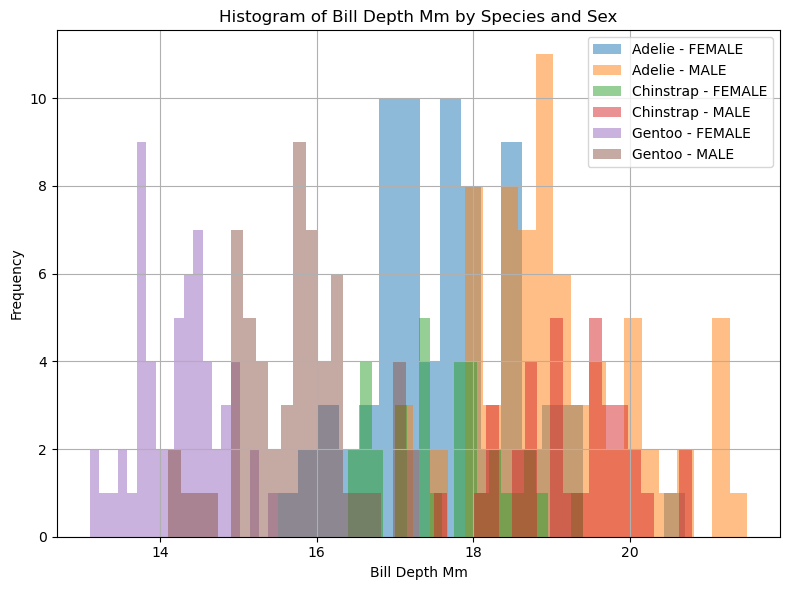

In [30]:
# Create subplots for each of the variables. 1 Row with 3 Columns.
fig, axes = plt.subplots(1, 1, figsize=(8, 6))

# The list of the variables from the data set we want the histograms for.
variable = 'bill_depth_mm'

# Group the data frame by species and sex based on our variable. Then apply them to lists of their own.
grouped_data = defineddf.groupby(['species', 'sex'])[variable].apply(list)

# Iterate over each species and sex in our grouped data.
for (species, sex), data in grouped_data.items():
    # This creates the histogram to the subplot.
    axes.hist(data, bins=20, alpha=0.5, label=f'{species} - {sex}')

# Labelling
axes.set_title(f'Histogram of {variable.replace("_", " ").title()} by Species and Sex')
axes.set_xlabel(variable.replace("_", " ").title())
axes.set_ylabel('Frequency')
axes.legend()
axes.grid(True)

plt.tight_layout()
plt.show()



## Histogram comments:
We can see that there is significant overlap of most of the species bill depth in the middle of our histogram but that the recurring trend of males have larger measurements then females continues. Especially for the Chinstrap and Adelie penguins. Interestingly we can see that the smallest bill depth is definitely the Gentoo species 

In [31]:

# Calculate mean bill depth for each species and sex
mean_bill_depth = defineddf.groupby(['species', 'sex'])['bill_depth_mm'].mean().reset_index()

# Pivot the data to compare bill depth between sexes for each species
pivoted_depth = mean_bill_depth.pivot(index='species', columns='sex', values='bill_depth_mm')

# Calculate difference and percentage difference between sexes
pivoted_depth['Difference'] = abs(pivoted_depth['FEMALE'] - pivoted_depth['MALE'])
pivoted_depth['Percentage Difference (%)'] = abs((pivoted_depth['Difference'] / pivoted_depth['MALE']) * 100)

# Round all values to 2 decimal places
pivoted_depth = pivoted_depth.round(2)

# Display the table
print(pivoted_depth)

sex        FEMALE   MALE  Difference  Percentage Difference (%)
species                                                        
Adelie      17.62  19.07        1.45                       7.61
Chinstrap   17.59  19.25        1.66                       8.65
Gentoo      14.24  15.72        1.48                       9.42


Delving into this a bit more we can see that the percentage difference between male and females of the same species is in around the 7-10 % mark which is consistent with the bill length measurements. We can also see that the Gentoo penguins have the smallest bill depth of any of the species and that this could be used to potentially aid in identifying an unknown species of penguin more reliably then for a Chinstrap or an Adelie. 

### References for above bar chart and histogram:
<small>

Matplotlib  Documentation: [Matplotlib](https://matplotlib.org/stable/contents.html) Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

Pandas  Documentation: [Pandas](https://pandas.pydata.org/pandas-docs/stable/index.html) Pandas is a powerful library for data manipulation and analysis in Python, providing high-level data structures and functions to make working with structured data easy and intuitive.

Enumerate Function Documentation: [enumerate()](https://docs.python.org/3/library/functions.html#enumerate) The `enumerate()` function is used to loop over an iterable, providing both the index and the value of each item during iteration, which is useful for keeping track of the index while iterating.

GroupBy in Pandas Documentation: [Group By: split-apply-combine](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) The `groupby()` function in Pandas is used to split the DataFrame into groups based on some criteria, typically followed by an aggregation or transformation operation.

Barcharts in Matplotlib Documenation [Bar Charts](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) Matplotlib provides functions for creating bar charts. Each bar typically represents a category, and the height of the bar corresponds to the value associated with that category. 

Histograms in Matplotlib Documentation: [Histograms](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) Matplotlib provides functions for creating histograms, which are graphical representations of the distribution of numerical data, showing the frequency of data points falling within specified ranges.


## Two Variable Correlation
The two variables selected to analyse to establish the extent to which they are correlated will be flipper length and body mass. The raionale behind this is similar to that of other mammals and reptiles, that the larger the animal the larger the need is for their limbs to be. This is even a teqnique used for estimating the size of extinct animals as observed by Campione and Evans. When thought about, this makes sense as larger animals in this case penguins would require larger and longer flippers in order to move larger masses, their own bodies, through water.


<small>
Reference: 
Campione, N.E., Evans, D.C. A universal scaling relationship between body mass and proximal limb bone dimensions in quadrupedal terrestrial tetrapods. BMC Biol 10, 60 (2012). https://doi.org/10.1186/1741-7007-10-60



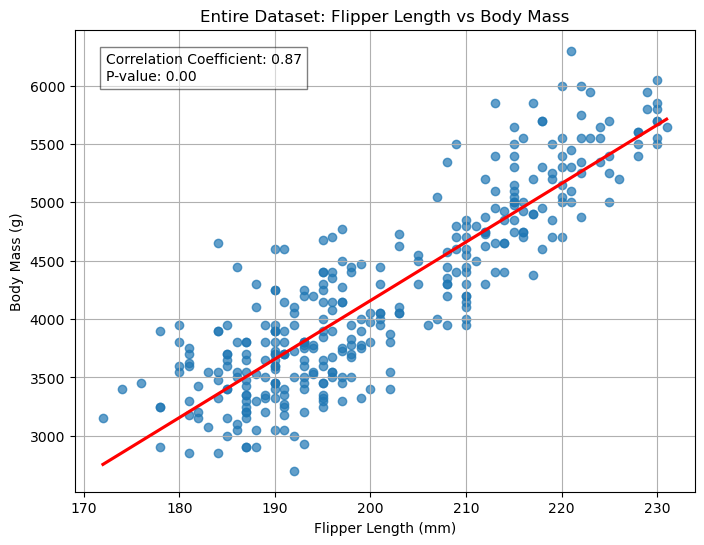

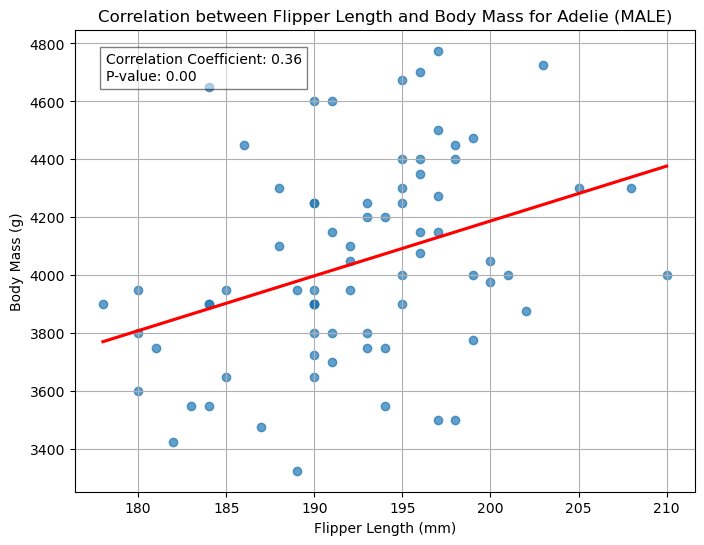

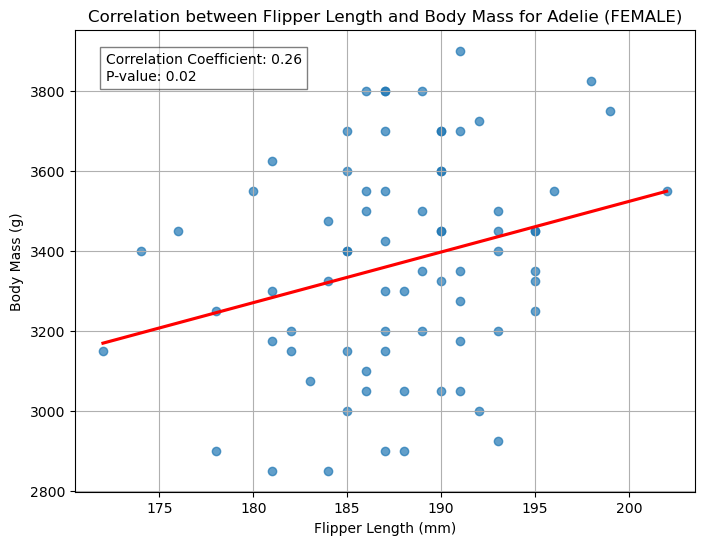

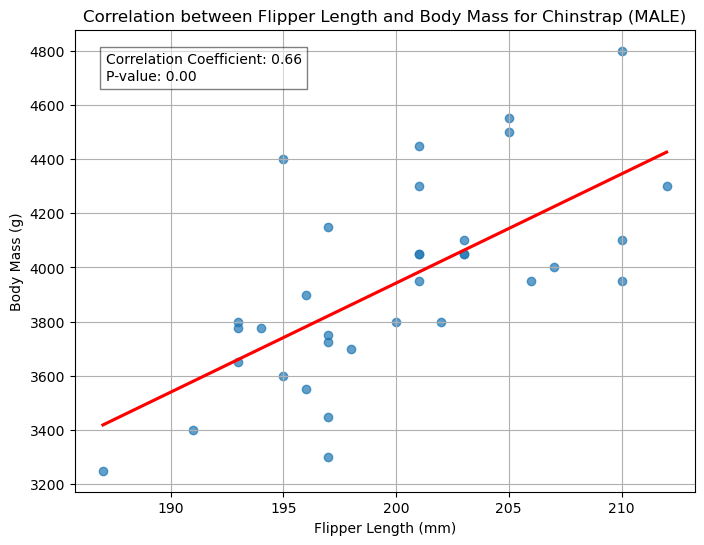

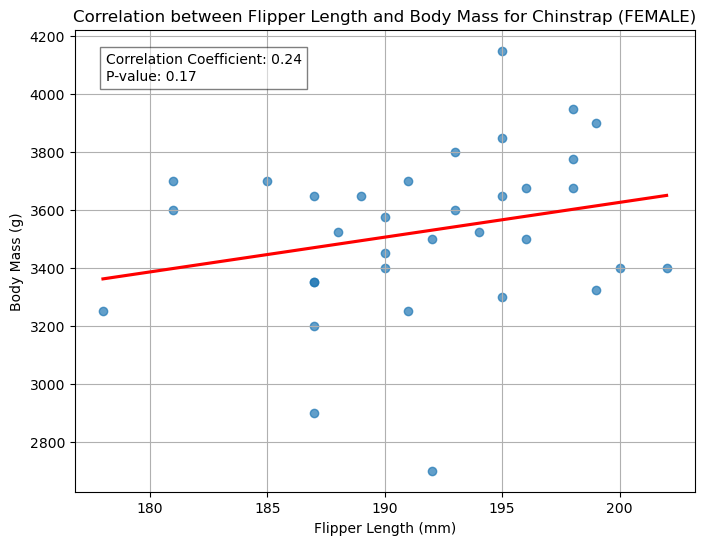

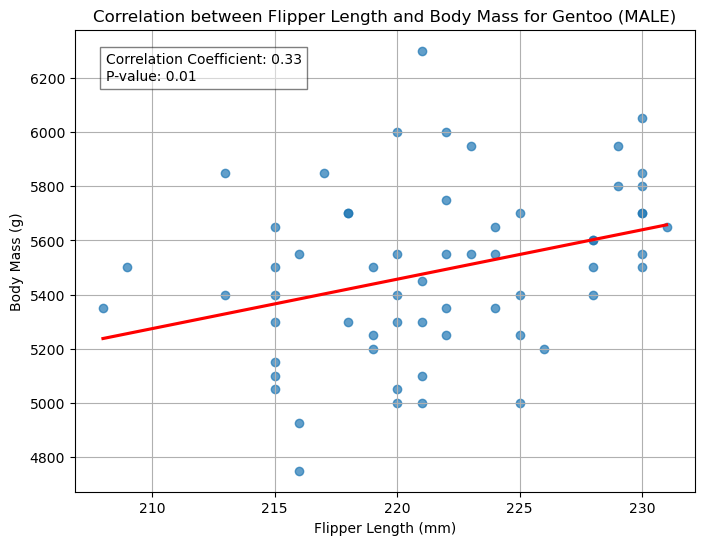

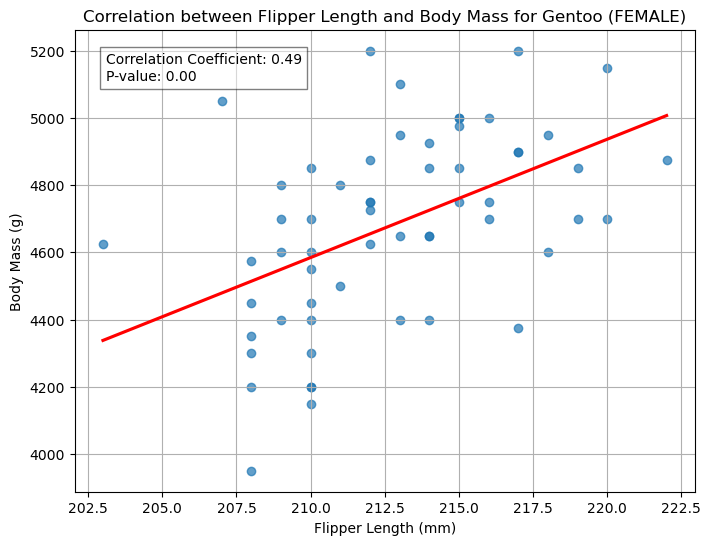

In [32]:
# Scipy stats is used to compute the Pearson correlation coefficient and p-value.
from scipy.stats import pearsonr

# Get unique species and sexes
species = defineddf['species'].unique()
sexes = defineddf['sex'].unique()

# Calculate correlation coefficient and p-value for entire dataset
entireflippers = defineddf['flipper_length_mm']
entirebodymass = defineddf['body_mass_g']
correlation_coefficient_entire, p_value_entire = pearsonr(entireflippers, entirebodymass)

# Plot entire dataset flipper length versus body mass on a Seaborn regression plot
plt.figure(figsize=(8, 6))
sns.regplot(x=entireflippers, y=entirebodymass, ci=None, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient_entire:.2f}\nP-value: {p_value_entire:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
plt.title('Entire Dataset: Flipper Length vs Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.grid(True)
plt.show()

# Plot scatterplots for each species and sex combination
for species_name in species:
    for sex_name in sexes:
        # Filter data for the current species and sex
        filtered_data = defineddf[(defineddf['species'] == species_name) & (defineddf['sex'] == sex_name)]
        
        # Plot scatterplot with regression line
        plt.figure(figsize=(8, 6))
        sns.regplot(data=filtered_data, x='flipper_length_mm', y='body_mass_g', ci=None, scatter_kws={'alpha':0.7}, line_kws={'color':'red'})
        
        # Calculate correlation coefficient and p-value
        correlation_coefficient, p_value = pearsonr(filtered_data['flipper_length_mm'], filtered_data['body_mass_g'])
        
        # Add correlation coefficient and p-value to plot
        plt.text(0.05, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}\nP-value: {p_value:.2f}', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.5))
        
        # Set plot title, labels, and legend
        plt.title(f'Correlation between Flipper Length and Body Mass for {species_name} ({sex_name})')
        plt.xlabel('Flipper Length (mm)')
        plt.ylabel('Body Mass (g)')
        plt.grid(True)
        plt.show()


### Two Variable Correlation Analysis

Based on our analysis of the dataset, there is a strong correlation between the flipper length and body mass of penguins. The Pearson correlation coefficient for the entire penguin dataset was 0.87, which, according to Akoglu (2018), indicates a strong to very strong correlation. The directionality of the dataset is positive, as indicated by the positive values of all data points. Simply put, the heavier the penguin, the more likely it is to have longer flippers than its lighter counterpart. This relationship could be useful in estimating the weight of a penguin given its flipper length and vice versa. However, it is important to consider the limitations of extrapolating data outside the given range, as this carries risks. The relationship between flipper length and body mass may change, or there may be a cutoff point beyond which the relationship no longer holds.

While it logically makes sense and the data supports it, outliers exist in nature, such as penguins with abnormally long flippers or unusually heavy ones. Additionally, environmental factors not considered in the dataset, such as the timing of each sample recording, can affect penguin weights, which vary throughout seasons due to factors like moulting and mating.

The other charts in our analysis break down the data by individual species and sexes. Here, we observe a decrease in correlation. All correlation coefficients are lower than 0.87, and in some instances, the p-values exceed 0.05. A p-value is another measure of the significance of correlation derived from hypothesis testing, calculated based on the area under the probability distribution curve. If the p-value is less than the significance level, typically around 0.05, a strong correlation can be inferred. However, charts with higher p-values should be interpreted with less confidence in the correlation.

One factor to consider in this context is that the overall dataset exhibits a high correlation with a low p-value, suggesting a strong relationship. However, insufficient individual data at the sex and species level may contribute to higher p-values in those breakdowns. If there is not enough data collected for a particular analysis, variability becomes more significant, and there is a lack of statistical power to determine a relationship.











<small>References:

-A paper that introduced correlation coefficients and their significance: Akoglu H. User's guide to correlation coefficients. Turk J Emerg Med. 2018 Aug 7;18(3):91-93. doi: 10.1016/j.tjem.2018.08.001. PMID: 30191186; PMCID: PMC6107969.

-Talking about the concerns of extrapolation :[Statistics at Square One: 11. Correlation and regression](https://www.bmj.com/about-bmj/resources-readers/publications/statistics-square-one/11-correlation-and-regression)

-Information regarding variability in penguin body weight: Edda Johannesen, Harald Steen & Lyndon Perriman (2002) Seasonal variation in survival, weights, and population counts of blue penguins (Eudyptula minor) in Otago, New Zealand, New Zealand Journal of Zoology, 29:3, 213-219, [DOI: 10.1080/03014223.2002.9518305](https://www.tandfonline.com/doi/pdf/10.1080/03014223.2002.9518305)

-Investopedia's article on p-values explains how they measure the likelihood of observing a test statistic, assuming the null hypothesis is true. It discusses statistical significance, calculation methods, and the importance of p-values in hypothesis testing: [Investopedia](https://www.investopedia.com/terms/p/p-value.asp)

-Information regarding why low p-values can occur: [Understanding Significance and P-Values](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4850233/#:~:text=As%20illustrated%20in%20Table%201,the%20variance%20is%20too%20large.)  
Author: National Center for Biotechnology Information (NCBI)

-Documentation on scipy stats pearsonr [Here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html)

-Seaborn regression plots [Here](https://seaborn.pydata.org/generated/seaborn.regplot.html)





</small>


***
###
End 